# Predictive Analysis of Steam Indie Games Success

## **1. Introduction**

This notebook is dedicated to the **Predictive Analysis** phase of our project, which focuses on determining the factors that contribute most to the success of indie games on the Steam platform. The goal is to build machine learning models that can predict the commercial success of a game based on its available metadata. This analysis aims to empower indie game developers by identifying actionable insights to enhance the appeal and marketability of their games.

The dataset used in this notebook was carefully cleaned and explored in the **Data Cleaning and Exploratory Data Analysis (EDA)** notebook, resulting in a robust and informative dataset that is ready for modeling.

## **2. Objectives of the Notebook**

1. **Feature Selection and Engineering**:
   - Identify the key features that will be used to build predictive models.
   - Use insights from the EDA phase to ensure relevant and impactful features are included.

2. **Model Development**:
   - Implement multiple machine learning algorithms to predict game success based on features like price, number of recommendations, genre, and developer information.
   - Evaluate and compare the performance of different models to select the best-performing approach.

3. **Training and Testing**:
   - Split the data into training and testing sets to ensure the reliability and robustness of the models.
   - Tune hyperparameters to optimize model performance.

4. **Model Evaluation**:
   - Assess the performance of the models using metrics such as accuracy, precision, recall, and R-squared.
   - Determine which model provides the best predictive capability and discuss the reasons behind its success.

## **3. Predictive Analysis Workflow**

The workflow for predictive analysis in this notebook is as follows:

1. **Data Preprocessing for Modeling**: 
   - Prepare the dataset for machine learning, including encoding categorical variables, splitting the data into training and testing sets, and normalizing features if necessary.

2. **Model Selection**:
   - **Random Forest** and **Logistic Regression** are the primary machine learning algorithms chosen for this analysis. These models were selected based on their ability to handle complex datasets and their interpretability.
   - Other models, such as **Support Vector Machines (SVM)** and **Gradient Boosting**, may also be considered to compare performance.

3. **Training and Hyperparameter Tuning**:
   - Train each model using the training dataset and utilize cross-validation to prevent overfitting.
   - Hyperparameter tuning will be conducted using Grid Search to find the optimal parameters for each model.

4. **Evaluation**:
   - Evaluate each model's performance using a separate test dataset.
   - Metrics such as **accuracy**, **F1-score**, **confusion matrix**, and **R-squared** will be used to assess the models' effectiveness.
   - Feature importance will be analyzed to determine which attributes have the most impact on game success.

## **4. Implementation Plan**

- **Modeling Techniques**: We will be using multiple models to provide a comprehensive understanding of the predictive capabilities of different techniques.
  - **Random Forest**: This model is known for its robustness and ability to handle a large number of features without overfitting.
  - **Logistic Regression**: Used for its simplicity and effectiveness in binary classification problems, such as predicting game success.
  - **Gradient Boosting** (optional): If time permits, this model will be used to see if boosting methods provide superior performance.

- **Data Split**: The dataset will be divided into an **80/20 split**, where **80%** of the data is used for training and **20%** for testing. This approach ensures that the model is evaluated on unseen data to test its generalizability.

- **Tools and Libraries**: The following libraries will be used for modeling:
  - **Pandas** and **NumPy** for data manipulation.
  - **scikit-learn** for model training, evaluation, and hyperparameter tuning.
  - **Matplotlib** and **Seaborn** for visualizing model performance and feature importance.

## **5. Expected Outcomes**

- **Model Comparison**: By comparing different models, we expect to identify the best-performing algorithm for predicting indie game success on Steam.
- **Feature Insights**: We aim to determine which features (e.g., price, user engagement, genre) are the most critical drivers of game success.
- **Practical Guidance for Developers**: The insights gained from this analysis can be used by indie developers to make data-driven decisions that increase the likelihood of their games being successful.

## **6. Notebook Structure**

1. **Data Preprocessing for Modeling**: Preparing the dataset by encoding categorical variables and splitting the data.
2. **Model Development**: Training and testing machine learning models on the dataset.
3. **Hyperparameter Tuning**: Using techniques such as Grid Search to optimize model parameters.
4. **Model Evaluation**: Comparing models based on various metrics and selecting the best model.
5. **Feature Importance Analysis**: Understanding which features are the key drivers of success.

## **7. Next Steps**

Once the predictive analysis phase is complete, we will incorporate these results into the final project report, highlighting key insights and recommendations for indie game developers. The findings from this analysis will also be used to answer discussion prompts and present our approach to peers.

---

By the end of this notebook, we will have built and evaluated multiple machine learning models that predict the success of indie games on Steam. This analysis will not only demonstrate the power of machine learning in making data-driven decisions but also provide actionable insights to help developers navigate the competitive indie game landscape.


In [15]:
# Cell 1: Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [ ]:
# Cell 2: Load the cleaned dataset and conveert 'Release Date' to datetime format
dataset_path = r"C:\Users\derek\OneDrive\Documents\Capstone\steam-indie-success\data\steam_indie_games_cleaned_v3.csv"
data = pd.read_csv(dataset_path)

# Convert 'Release Date' to datetime format
data['Release Date'] = pd.to_datetime(data['Release Date'], errors='coerce')

# Verify the conversion
print(data['Release Date'].head())
print(data.info())




0   2023-10-27
1   2015-02-27
2   2024-01-06
3   2021-08-25
4   2015-08-14
Name: Release Date, dtype: datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   AppID                             287 non-null    int64         
 1   Game Name                         287 non-null    object        
 2   Release Date                      287 non-null    datetime64[ns]
 3   Price ($)                         287 non-null    float64       
 4   Recommendations                   287 non-null    float64       
 5   Action                            287 non-null    bool          
 6   Adventure                         287 non-null    bool          
 7   Casual                            287 non-null    bool          
 8   Early Access                      287 non-null    bool          
 9   Fre

Full Dataset Target Distribution:
Raw_Recommendations
0    287
Name: count, dtype: int64


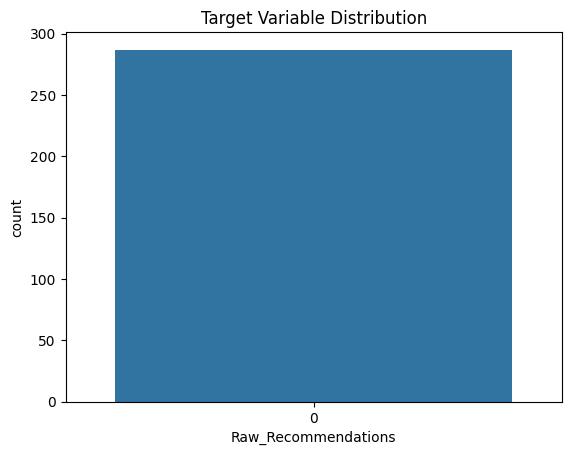

In [20]:
# Cell 3: Analyze tTarget Distribution

# Define the target variable
# Assuming success is defined by more than 500 Raw Recommendations
target = (data['Raw_Recommendations'] > 500).astype(int)

# Check the distribution of the target variable in the full dataset
print("Full Dataset Target Distribution:")
print(target.value_counts())

# Optional: Visualize the distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=target)
plt.title("Target Variable Distribution")
plt.show()


In [18]:
# Cell 3: Feature Selection and Train-Test Split

# Define the target variable
# Assuming success is defined by more than 500 Raw Recommendations
target = (data['Raw_Recommendations'] > 500).astype(int)

# Select features for modeling
features = data[['Price ($)', 'Years Since Release', 'Action', 'Adventure', 'Indie']]

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Display the shapes of the splits
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)



Training Features Shape: (229, 5)
Testing Features Shape: (58, 5)
Training Target Shape: (229,)
Testing Target Shape: (58,)


In [19]:
# Cell 4: Train a Random Forest Classifier

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        58

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58


Confusion Matrix:
 [[58]]


c:\Users\derek\OneDrive\Documents\Capstone\steam-indie-success\.venv\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
